In [3]:
import os
groq_api_key='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'

In [4]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_api_key, model_name='Gemma2-9b-it')

In [9]:
# start writing chat bot
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [13]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)
    

In [14]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node("chatbot", chatbot)

In [16]:
graph_builder

In [17]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [18]:
graph = graph_builder.compile()

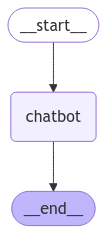

In [21]:
# dispaly images

from IPython.display import Image, display
try:
    img_bytes = graph.get_graph().draw_mermaid_png()
    display(Image(img_bytes))
except Exception:
    pass
    

In [ ]:
while True:
    user_input=input("user : ")
    if user_input.lower() in ['quit', 'q']:
        print("bye")
    for event in graph.stream({'messages': ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print("Assistant : ", value["messages"].content)

user :  Hi


dict_values([{'messages': AIMessage(content='Hi! 👋\n\nWhat can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.9e-07, 'queue_time': 0.02416215, 'total_time': 0.027273117}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f102b6a4-b1ab-4ece-b635-f6ec300899cc-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
Assistant :  Hi! 👋

What can I do for you today?



user :  I am learning langgraph.. need some tipes


dict_values([{'messages': AIMessage(content="It's great that you're learning about language models! They're fascinating and powerful tools. \n\nTo give you the best tips, I need a little more information about what you're trying to learn. \n\nCould you tell me more about:\n\n* **Your current level of understanding:** Are you just starting out, or do you have some experience with natural language processing (NLP)?\n* **Your goals:** What do you want to be able to do with language models? Are you interested in building your own, using them for research, or applying them to a specific task?\n* **Specific areas you're struggling with:** Are there any particular concepts or techniques that you're finding difficult to grasp?\n\nOnce I have a better understanding of your needs, I can provide more tailored and helpful tips.\n\nIn the meantime, here are some general resources that might be useful:\n\n* **Hugging Face:** [https://huggingface.co/](https://huggingface.co/) - A great platform for e

user :  quit


bye
dict_values([{'messages': AIMessage(content='I understand that you want me to quit.\n\nIs there anything else I can help you with before I go?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 10, 'total_tokens': 36, 'completion_time': 0.047272727, 'prompt_time': 3.9e-07, 'queue_time': 0.02406627, 'total_time': 0.047273117}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-bd872318-ba4b-4684-81bd-bdbf539d6d10-0', usage_metadata={'input_tokens': 10, 'output_tokens': 26, 'total_tokens': 36})}])
Assistant :  I understand that you want me to quit.

Is there anything else I can help you with before I go?



user :  no


dict_values([{'messages': AIMessage(content='I understand. Is there anything else I can help you with?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.7e-07, 'queue_time': 0.024972176000000002, 'total_time': 0.029091279}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-d4a98f91-8ab1-407e-a4fc-cbe0b20dfc6a-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
Assistant :  I understand. Is there anything else I can help you with?



user :  q


bye
dict_values([{'messages': AIMessage(content="Please provide me with a question or a statement so I can assist you. 😊 \n\nFor example, you could ask:\n\n* What is the capital of France?\n* Tell me a joke.\n* Write a short story about a cat. \n\nI'm ready! ✨\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 10, 'total_tokens': 72, 'completion_time': 0.112727273, 'prompt_time': 3.9e-07, 'queue_time': 0.024239828, 'total_time': 0.112727663}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7104dcb7-39ef-44e2-b7cb-0bdb6a92330c-0', usage_metadata={'input_tokens': 10, 'output_tokens': 62, 'total_tokens': 72})}])
Assistant :  Please provide me with a question or a statement so I can assist you. 😊 

For example, you could ask:

* What is the capital of France?
* Tell me a joke.
* Write a short story about a cat. 

I'm ready! ✨

